--- Data Head ---
  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1       

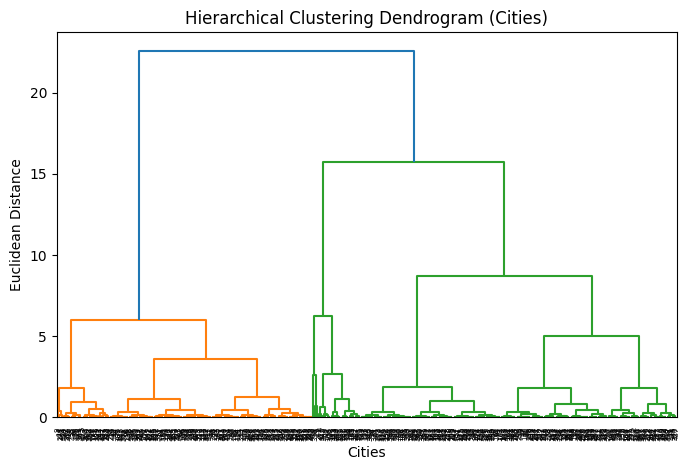


--- Clustered Data ---
   effective_literacy_rate_total  Cluster
0                          79.86        3
1                          91.99        1
2                          80.51        3
3                          83.46        3
4                          68.38        2

Cluster-wise Average Literacy Rate:
Cluster
1    90.447291
2    71.010526
3    82.978611
Name: effective_literacy_rate_total, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

df = pd.read_csv("Cities_r2.csv")
print("--- Data Head ---")
print(df.head())

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.fillna(df.mean(numeric_only=True), inplace=True)

X = df[['effective_literacy_rate_total']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Cities)")
plt.xlabel("Cities")
plt.ylabel("Euclidean Distance")
plt.show()

clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters

print("\n--- Clustered Data ---")
print(df[['effective_literacy_rate_total', 'Cluster']].head())

print("\nCluster-wise Average Literacy Rate:")
print(df.groupby('Cluster')['effective_literacy_rate_total'].mean())
